# Notebook 9 - Redes Neuronales en Tensorflow.


## 1. Red Neuronal Multicapa para MNIST.

Hoy trabajaremos nuevamente sobre el conocidísimo dataset MNIST. Este dataset contiene 20.000 muestras de imagenes de 28x28 píxeles (784 píxeles), que nosotros trataremos como variables independientes. Es decir, trabajaremos con un dataset de dimensiones 20.000x784. Cada una de las variables de entrada contiene un valor entero que varía de 0 a 255 indicando la intensidad en escala de grises del pixel correspondiente.

El Viernes pasado conseguimos obtener aproximadamente un 50% de precisión con un clasificador semi-supervisado (50 puntos) y cerca de un 90% de precisión con un clasificador logístico (entrenado con todos los puntos). ¿Podemos conseguir una mejor precisión utilizando una Red Neuronal Multicapa? ¡Vamos a verlo!

---

**Tu tarea:** Vamos a utilizar las funcionalidades de Keras para crear y entrenar a nuestro clasificador. En este caso, deberás de utilizar la documentación de Keras para ver cómo conseguir esto. Te puede interesar ver cómo te pueden ayudar funciones como ***tf.keras.layers.Dense(...)***, ***tf.keras.layers.Sequential(...)*** o *** model.fit()***.

1. Recuerda que para comenzar deberás de preprocesar correctamente tus datos: escalar las variables, convertir etiquetas a **one-hot label**, etc.
2. Una vez tengas tus datos, genérate tus datos de entrenamiento y de validación.
3. Construye tu modelo con Keras. En este punto tienes libertad para elegir cuántas capas utilizar, cuántas neuronas, qué tipo de función de activación, etc. Cada decisión que tomes de la arquitectura debe de estar justificada. Utiliza Google para apoyar tus decisiones.
4. Entrena tu modelo con Keras. En este punto tienes libertad para elegir qué optimizador usar, qué learning-rate, qué batch_size, epochs, etc. Cada decisión que tomes de la arquitectura debe de estar justificada. Utiliza Google para apoyar tus decisiones.
5. Cuando entrenes a tu modelo, para cada *epoch* muestra métricas de *MSE* y *Accuracy*.
6. Una vez tengas a tu modelo entrenado, ¿Qué accuracy has obtenido? Selecciona algunos ejemplos que NO hayan sido clasificados correctamente por tu clasificador y visualizalos. Muestra igualmente en el título de cada gráfica la predicción generada por tu modelo. ¿Tienen sentido esos fallos?.



In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras
from keras import backend as K
from sklearn import preprocessing

## COMIENZA AQUÍ TU CÓDIGO ##


Using TensorFlow backend.


In [0]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler

mnist = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

print(mnist.shape)

X = np.matrix(mnist.iloc[:,1:785])
Y = np.array(mnist.iloc[:,0]).reshape(20000, 1)

del mnist

print(X.shape, Y.shape)

scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)
# X = X / 255
Y = to_categorical(Y, num_classes=10)

(20000, 785)
(20000, 784) (20000, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(784,)


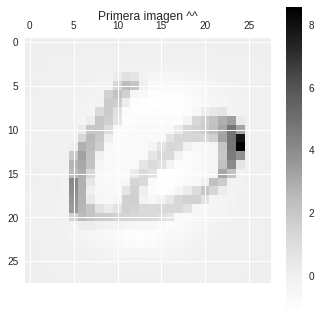

In [0]:

img0 = X[0] # Seleccionamos la primera imagen.
print(img0.shape)

# Redimensionamos y visualizamos la imagen.
plt.matshow(img0.reshape(28, 28))
plt.title("Primera imagen ^^")
plt.colorbar()
plt.show()

In [0]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import optimizers
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['mse', 'accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=.15)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

Train on 11900 samples, validate on 2100 samples
Epoch 1/20
11900/11900 [==============================] - 2s 197us/step - loss: 0.4274 - mean_squared_error: 0.0182 - acc: 0.8752 - val_loss: 0.2763 - val_mean_squared_error: 0.0107 - val_acc: 0.9295
Epoch 2/20
11900/11900 [==============================] - 2s 173us/step - loss: 0.1394 - mean_squared_error: 0.0062 - acc: 0.9605 - val_loss: 0.2526 - val_mean_squared_error: 0.0096 - val_acc: 0.9419
Epoch 3/20
11900/11900 [==============================] - 2s 173us/step - loss: 0.0732 - mean_squared_error: 0.0029 - acc: 0.9821 - val_loss: 0.2491 - val_mean_squared_error: 0.0084 - val_acc: 0.9481
Epoch 4/20
11900/11900 [==============================] - 2s 174us/step - loss: 0.0361 - mean_squared_error: 0.0013 - acc: 0.9928 - val_loss: 0.2339 - val_mean_squared_error: 0.0080 - val_acc: 0.9514
Epoch 5/20
11900/11900 [==============================] - 2s 174us/step - loss: 0.0202 - mean_squared_error: 5.3703e-04 - acc: 0.9976 - val_loss: 0.231

In [0]:
loss_and_metrics

[0.2328162823120753, 0.00723367927223444, 0.9555000004768371]

In [0]:
yp = model.predict(x_test)

In [0]:
mask = np.argmax(yp, axis=1) != np.argmax(y_test, axis=1)
x_bad = x_test[mask]
y_bad = y_test[mask]
yp_bad = yp[mask]

In [0]:
for c in np.random.choice(len(x_bad), 500):
  img = scaler.inverse_transform(x_bad[c])
  plt.matshow(img.reshape(28, 28))
  plt.title('Es un ' + str(np.argmax(y_bad[c])) + ' pero predice ' + str(np.argmax(yp_bad[c])))
  plt.colorbar()
  plt.show()
  
  #françois cholet

Output hidden; open in https://colab.research.google.com to view.